#For this chapter, I will use the mnist dataset
#I will reduce the dataset dimensions to 2, using T-SNE

In [5]:
from sklearn.datasets import fetch_openml
mnist_ = fetch_openml(name="mnist_784", version='active')

In [6]:
X = mnist_["data"]


In [7]:
from sklearn.manifold import TSNE
import numpy as np

np.random.seed(42)

m = 2000
idx = np.random.permutation(60000)[:m]

X_subset = mnist_['data'][idx]

In [9]:
T_SNE = TSNE()

In [11]:
X_t_sne = T_SNE.fit_transform(X_subset)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


In [16]:
from sklearn.cluster import KMeans
K_means = KMeans(n_clusters=9)

In [17]:
K_means.fit(X_t_sne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
K_means.cluster_centers_

array([[ 28.917057  , -18.265165  ],
       [-51.382427  ,  -0.19275379],
       [-10.722221  ,  38.867634  ],
       [ 32.00532   ,  34.37851   ],
       [  1.5444002 , -30.364918  ],
       [  5.994891  ,   5.65527   ],
       [ 60.966747  ,   6.1553497 ],
       [-21.573742  ,  15.848401  ],
       [-37.238026  , -28.917252  ]], dtype=float32)

In [23]:
K_means.cluster_centers_[1]

array([-51.382427  ,  -0.19275379], dtype=float32)

* Plotting clusters centroids

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


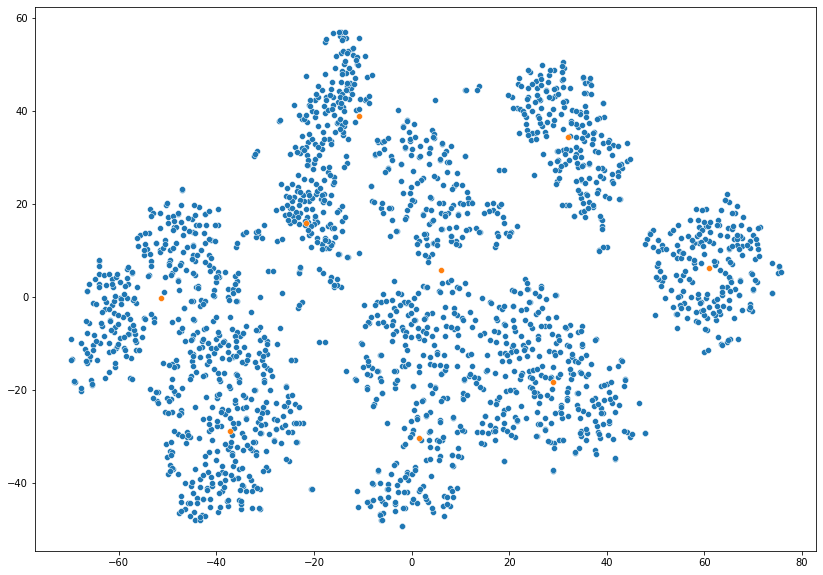

In [26]:
plt.figure(figsize=(14,10))

sns.scatterplot(X_t_sne[:,0], X_t_sne[:,1])
sns.scatterplot(K_means.cluster_centers_[:,0], K_means.cluster_centers_[:,1])

In [27]:
K_means.inertia_

306397.83422215283